In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/BTL nhap mon ML/metadata (1).csv"
df = pd.read_csv(file_path)

df.head(5)

,patientid,sex,age,temperature,pO2 saturation,notes,cough,fever,healthy,fatigue,shortness_of_breath,chest_pain,COVID-19,PNEUMONIA,NORMAL
0,P0001,1,45,38.5,89,cough and shortness of breath,1,0,0,0,1,0,True,False,False
1,P0002,0,32,36.7,98,no symptoms,0,0,1,0,0,0,False,False,True
2,P0003,1,56,39.0,88,high fever cough and shortness of breath,1,1,0,0,1,0,False,True,False
3,P0004,0,41,37.9,90,dry cough,1,0,0,0,0,0,True,False,False
4,P0005,1,29,36.5,99,healthy patient no cough,1,0,1,0,0,0,False,False,True


In [33]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

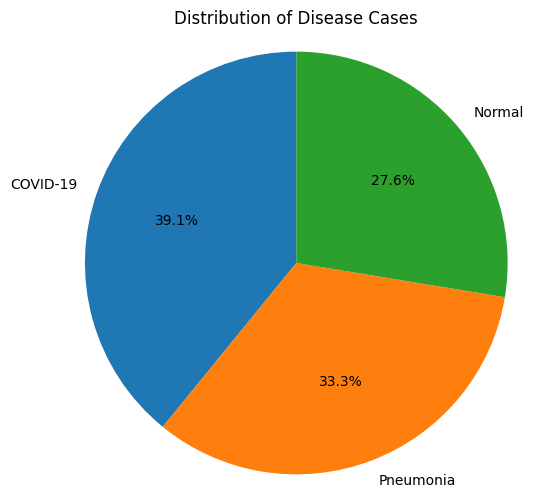

In [34]:
# Đếm số ca
covid_count = df['COVID-19'].sum()
pneumonia_count = df['PNEUMONIA'].sum()
normal_count = df['NORMAL'].sum()

labels = ['COVID-19', 'Pneumonia', 'Normal']
sizes = [covid_count, pneumonia_count, normal_count]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Disease Cases')
plt.axis('equal')  # Pie tròn đều

plt.show()

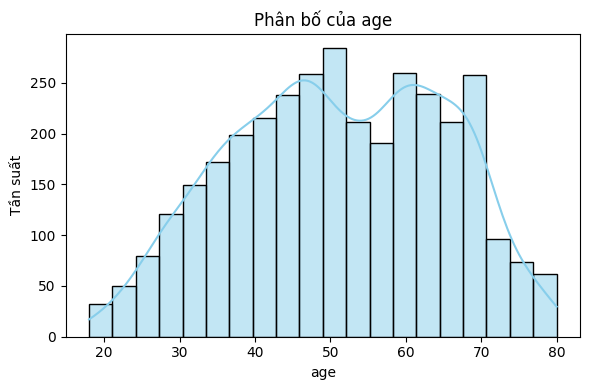

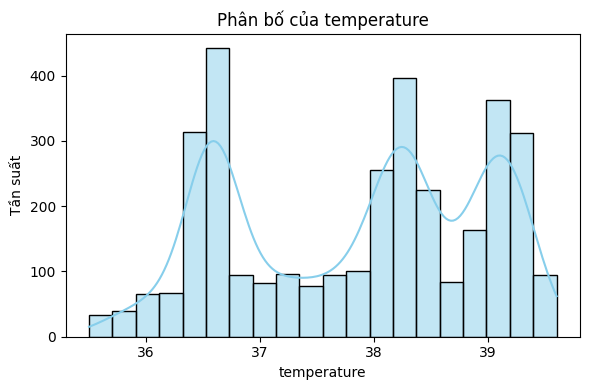

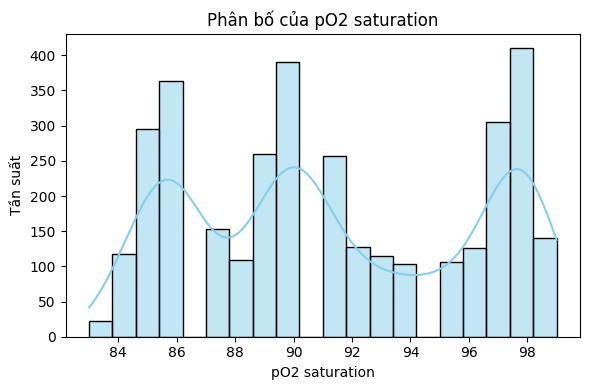

In [35]:
#1️ Histogram cho các cột số
num_cols = ['age', 'temperature', 'pO2 saturation']
for col in num_cols:
   plt.figure(figsize=(6,4))
   sns.histplot(df[col], kde=True, bins=20, color='skyblue')
   plt.title(f'Phân bố của {col}')
   plt.xlabel(col)
   plt.ylabel('Tần suất')
   plt.tight_layout()
   plt.show()

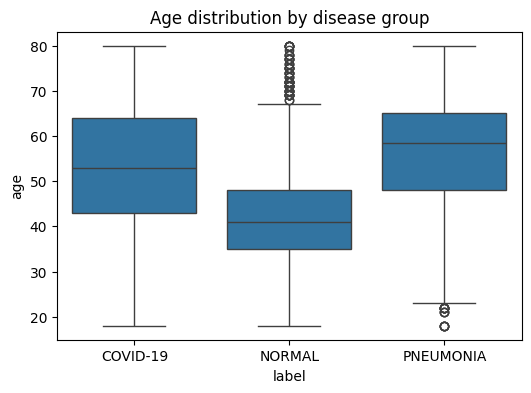

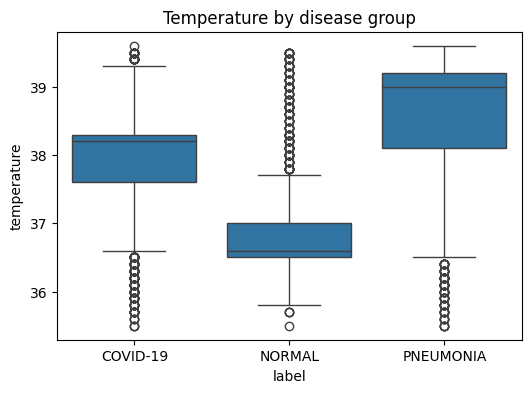

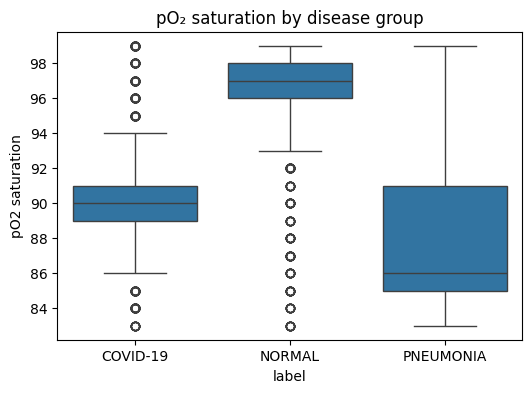

In [36]:
label_cols = ['COVID-19', 'PNEUMONIA', 'NORMAL']
df[label_cols] = df[label_cols].replace({'TRUE': True, 'FALSE': False})
df['label'] = df[label_cols].idxmax(axis=1)

#Age
plt.figure(figsize=(6,4))
sns.boxplot(
    x='label',
    y='age',
    data=df
)
plt.title('Age distribution by disease group')
plt.show()

#Temperature
plt.figure(figsize=(6,4))
sns.boxplot(
    x='label',
    y='temperature',
    data=df
)
plt.title('Temperature by disease group')
plt.show()

#pO2 saturation
plt.figure(figsize=(6,4))
sns.boxplot(
    x='label',
    y='pO2 saturation',   # đúng như trong Excel
    data=df
)
plt.title('pO₂ saturation by disease group')
plt.show()


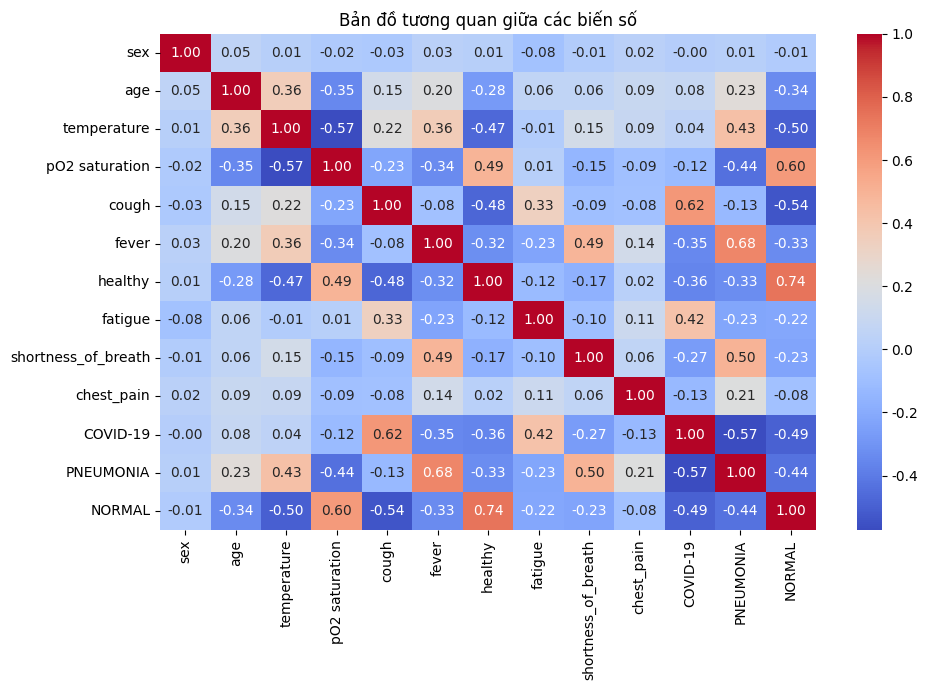

In [37]:
corr = df.select_dtypes(include=['number', 'bool']).corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Bản đồ tương quan giữa các biến số')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4045682443.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette='viridis')


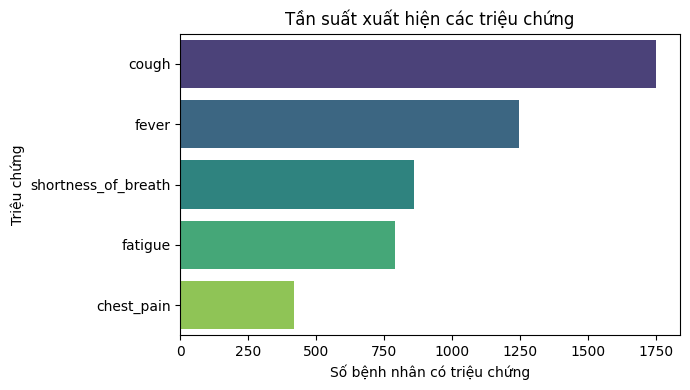

In [38]:
symptoms = ['cough', 'fever', 'fatigue', 'shortness_of_breath', 'chest_pain']
symptom_counts = df[symptoms].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette='viridis')
plt.title('Tần suất xuất hiện các triệu chứng')
plt.xlabel('Số bệnh nhân có triệu chứng')
plt.ylabel('Triệu chứng')
plt.tight_layout()
plt.show()

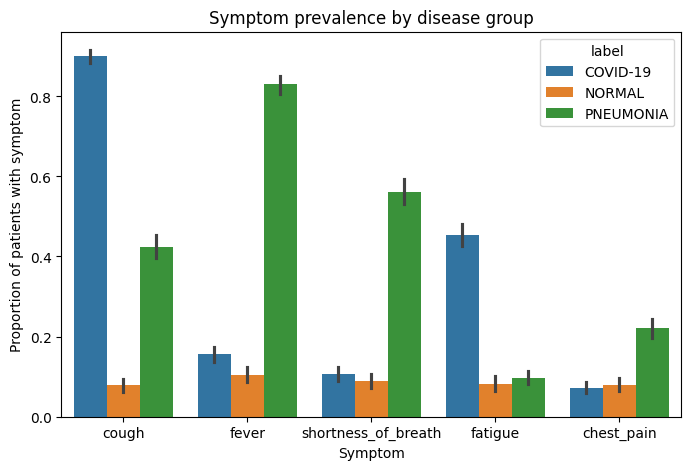

In [39]:
symptom_cols = [
    'cough',
    'fever',
    'shortness_of_breath',
    'fatigue',
    'chest_pain'
]

label_cols = ['COVID-19', 'PNEUMONIA', 'NORMAL']

df[label_cols] = df[label_cols].replace({'TRUE': True, 'FALSE': False})
df['label'] = df[label_cols].idxmax(axis=1)

df_symptom = df.melt(
    id_vars='label',
    value_vars=symptom_cols,
    var_name='symptom',
    value_name='present'
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=df_symptom,
    x='symptom',
    y='present',
    hue='label',
    estimator='mean'
)
plt.ylabel('Proportion of patients with symptom')
plt.xlabel('Symptom')
plt.title('Symptom prevalence by disease group')
plt.show()

/tmp/ipython-input-1791450040.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


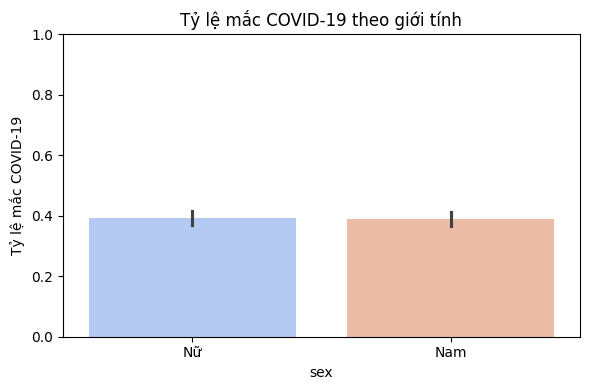

/tmp/ipython-input-1791450040.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


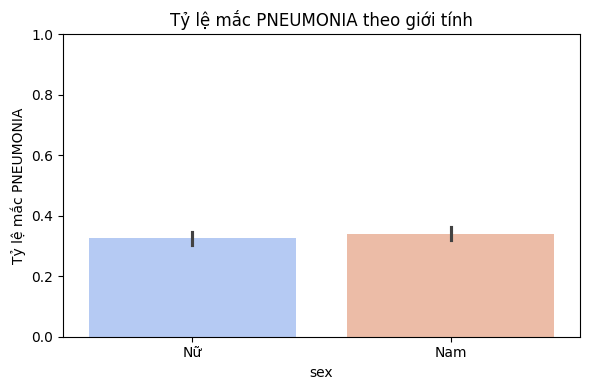

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

#barplot biểu diễn tỉ lệ mắc covid-19 theo từng giới
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x='sex',
    y='COVID-19',
    estimator='mean',
    palette='coolwarm'
)

plt.xticks([0, 1], ['Nữ', 'Nam'])
plt.ylabel('Tỷ lệ mắc COVID-19')
plt.title('Tỷ lệ mắc COVID-19 theo giới tính')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

#barplot biểu diễn tỉ lệ mắc peneumonia theo từng giới
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x='sex',
    y='PNEUMONIA',
    estimator='mean',
    palette='coolwarm'
)

plt.xticks([0, 1], ['Nữ', 'Nam'])
plt.ylabel('Tỷ lệ mắc PNEUMONIA')
plt.title('Tỷ lệ mắc PNEUMONIA theo giới tính')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

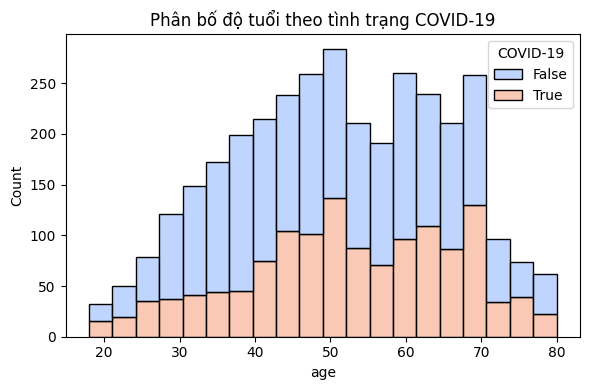

In [41]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='age', hue='COVID-19', multiple='stack', bins=20, palette='coolwarm')
plt.title('Phân bố độ tuổi theo tình trạng COVID-19')
plt.tight_layout()
plt.show()

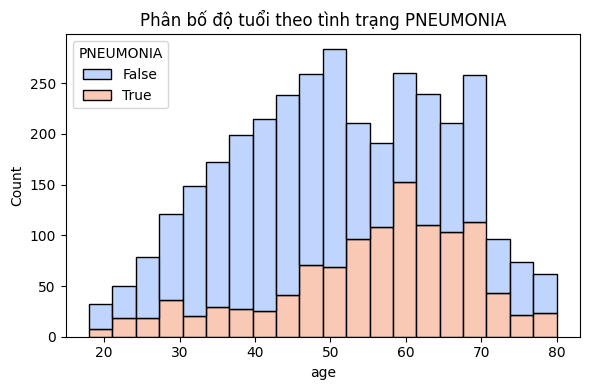

In [42]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='age', hue='PNEUMONIA', multiple='stack', bins=20, palette='coolwarm')
plt.title('Phân bố độ tuổi theo tình trạng PNEUMONIA')
plt.tight_layout()
plt.show()

<Axes: xlabel='age_group', ylabel='COVID-19'>

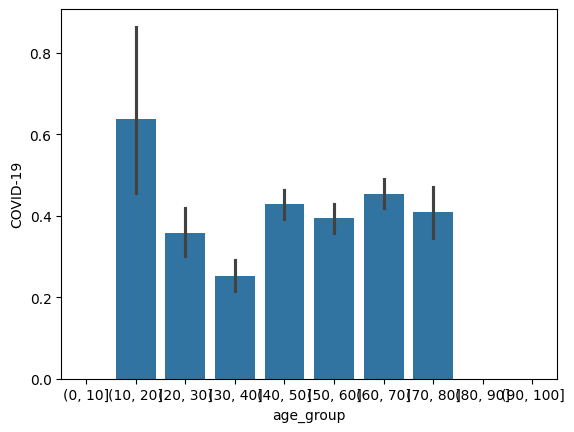

In [48]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[0,10,20,30,40,50,60,70,80,90,100]
)

sns.barplot(
    data=df,
    x='age_group',
    y='COVID-19',
    estimator='mean'
)

<Axes: xlabel='age_group', ylabel='PNEUMONIA'>

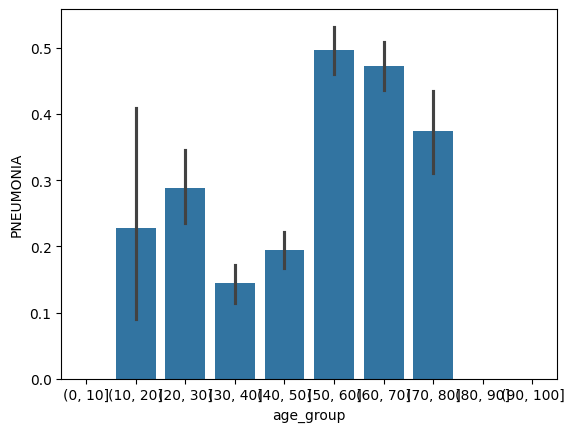

In [49]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[0,10,20,30,40,50,60,70,80,90,100]
)

sns.barplot(
    data=df,
    x='age_group',
    y='PNEUMONIA',
    estimator='mean'
)

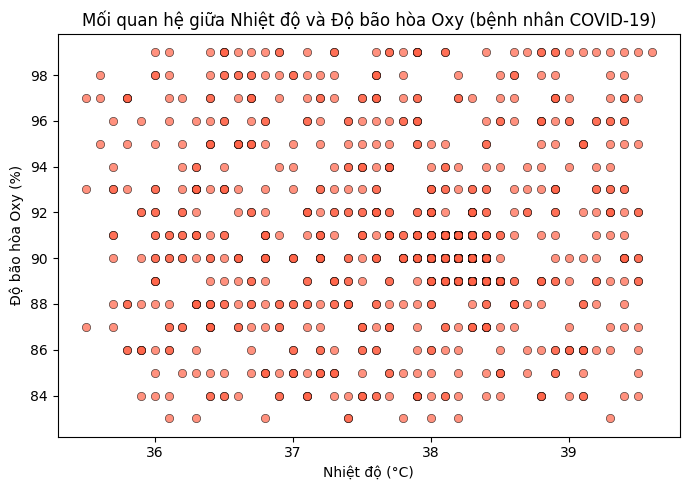

In [44]:
# Lọc dữ liệu chỉ gồm bệnh nhân mắc COVID-19
df_covid = df[df['COVID-19'] == True]

# Tạo biểu đồ scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df_covid,
    x='temperature',
    y='pO2 saturation',
    color='tomato',
    alpha=0.7,
    edgecolor='black'
)

# Thêm tiêu đề và nhãn trục
plt.title('Mối quan hệ giữa Nhiệt độ và Độ bão hòa Oxy (bệnh nhân COVID-19)')
plt.xlabel('Nhiệt độ (°C)')
plt.ylabel('Độ bão hòa Oxy (%)')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

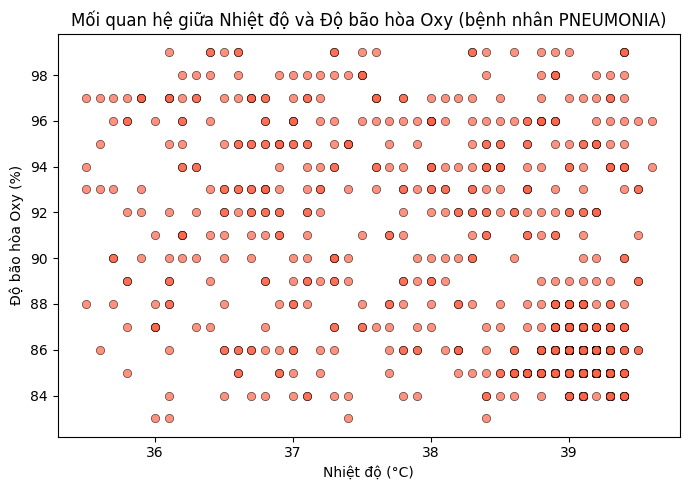

In [45]:
# Lọc dữ liệu chỉ gồm bệnh nhân mắc COVID-19
df_covid = df[df['PNEUMONIA'] == True]

# Tạo biểu đồ scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df_covid,
    x='temperature',
    y='pO2 saturation',
    color='tomato',
    alpha=0.7,
    edgecolor='black'
)

# Thêm tiêu đề và nhãn trục
plt.title('Mối quan hệ giữa Nhiệt độ và Độ bão hòa Oxy (bệnh nhân PNEUMONIA)')
plt.xlabel('Nhiệt độ (°C)')
plt.ylabel('Độ bão hòa Oxy (%)')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()